In [1]:
from datetime import datetime
import pickle

import numpy as np
import pandas as pd
import tqdm

from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_theme(style="white")

In [2]:
tr_data = pd.read_csv('data/merged_221220_221231_with_contracts.csv')
tr_data.head()

,tx_hash,from,to,gas,gasPrice,blockNumber,timestamp_x,miner,timestamp_y,waiting,validator,public_key,validator_name,validator_address,pub_key_lido_status,validator_type,eth_datetime,eth_hour,is_contract_transaction
0,0x14e970dba71ef93b42f337d3494c4d6e8fee4d83ce38...,0x498B859D2e59958E209d7DD262324C8D31b12B12,0xC1E088fC1323b20BCBee9bd1B9fC9546db5624C5,242494,117.114005,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True
1,0x33fcc824c05553a3ec31a7d71dc6dbb26cf51d608009...,0x07B873DE48807ec7B02B38cc31b4f96a6A507182,0x883B01205b938EC7268286d13Cb40a2045D2E78F,800000,23.932889,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True
2,0x555ffb08812804e23fe18467886edaa167f502488c6b...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,305170,17.248596,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True
3,0x9febfdc63677cd0decb532cb049004add2959d7f1a1f...,0xf7C8133baEa3313993B3c476c016aa869C991679,0x91c8D7e4080bed28e26FCE1b87cACcFaF7bbF794,292432,18.212433,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,1.671484e+09,3.0,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True
4,0xe24c2fb8e8d581d86710a0ca685e27ed6c36ca722d8e...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,245026,20.798797,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True


In [3]:
tr_data.shape

(11527306, 19)

In [4]:
with open('data/twelve_days_blocks.pickle', 'rb') as f:
    blocks_info = pickle.load(f)
len(blocks_info)

86002

In [5]:
blocks_info[16221291]

AttributeDict({'baseFeePerGas': 17248595741,
 'difficulty': 0,
 'extraData': HexBytes('0x627920406275696c64657230783639'),
 'gasLimit': 30000000,
 'gasUsed': 22334900,
 'hash': HexBytes('0x47113ab19d73a5c56854ae24273a1caf43b477a175964557464f92078f8317d0'),
 'logsBloom': HexBytes('0x0fac8947ded099117b9f11738b15373339dcee3184c1f7c8473f2dffd477c7fe7e85bb4fdf685c87cdea1bad99cded3f4e718ede7b4cf926cf8e856b36fb6d5d684c02fded70ffbaffcf3f9fdb51f9f5bff4d8f6c566569586aafc11ba063d52bb4f31cf2e0f64caa6c8f49118afe9f94b4fbc037ebc24d1ce619af3d79f7e752514bbfd8f6b1c5517ef8cfa033ec8bd6f87dd05b77a8faf4fe0914f63f3d19c8b9853485a377771ae82ddf8e782af8abf1f2e16a2ffabbb907feff7d4bc60dc633fd5d671918ddd95fc6fc77d0355862fd9db77feda8e7e09165fffbe4ce84ea932390e1d96def89edc39b555a44996e830115fc6cfa65d107dbe99d2017d4b'),
 'miner': '0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990',
 'mixHash': HexBytes('0xb807b663a409a370b45d6eee1fba7e646a0110f06011c44491a298684a201aa4'),
 'nonce': HexBytes('0x0000000000000000'),
 'number': 

In [6]:
with open('data/addresses_from_receipts.pickle', 'rb') as f:
    addresses_from_receipts = pickle.load(f)
len(addresses_from_receipts)

8357981

In [7]:
def get_baseFeePerGas(x):
    # _, row = x
    block_info = blocks_info[x['blockNumber']]
    return block_info['baseFeePerGas']

In [8]:
baseFeePerGas = tr_data.apply(get_baseFeePerGas, axis=1)

In [9]:
tr_data['baseFeePerGas'] = baseFeePerGas / 10**9
tr_data.head()

,tx_hash,from,to,gas,gasPrice,blockNumber,timestamp_x,miner,timestamp_y,waiting,validator,public_key,validator_name,validator_address,pub_key_lido_status,validator_type,eth_datetime,eth_hour,is_contract_transaction,baseFeePerGas
0,0x14e970dba71ef93b42f337d3494c4d6e8fee4d83ce38...,0x498B859D2e59958E209d7DD262324C8D31b12B12,0xC1E088fC1323b20BCBee9bd1B9fC9546db5624C5,242494,117.114005,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True,17.248596
1,0x33fcc824c05553a3ec31a7d71dc6dbb26cf51d608009...,0x07B873DE48807ec7B02B38cc31b4f96a6A507182,0x883B01205b938EC7268286d13Cb40a2045D2E78F,800000,23.932889,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True,17.248596
2,0x555ffb08812804e23fe18467886edaa167f502488c6b...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,305170,17.248596,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True,17.248596
3,0x9febfdc63677cd0decb532cb049004add2959d7f1a1f...,0xf7C8133baEa3313993B3c476c016aa869C991679,0x91c8D7e4080bed28e26FCE1b87cACcFaF7bbF794,292432,18.212433,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,1.671484e+09,3.0,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True,17.248596
4,0xe24c2fb8e8d581d86710a0ca685e27ed6c36ca722d8e...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,245026,20.798797,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True,17.248596


In [10]:
# Сколько у нас транзакций имеют отрицательное время ожидания

n_negative_waiting = len(tr_data[tr_data['waiting'] < 0])
print(f'Транзакции с отрицательным временем ожидания: {n_negative_waiting} ({n_negative_waiting / len(tr_data) * 100:0.2f}%)')

Транзакции с отрицательным временем ожидания: 83622 (0.73%)


In [11]:
tr_data['wait_time_adjusted'] = tr_data['waiting']
tr_data.loc[tr_data['wait_time_adjusted'] < 0, 'wait_time_adjusted'] = 0
tr_data.loc[tr_data['wait_time_adjusted'].isna(), 'wait_time_adjusted'] = 0

# Get OFAC list

In [12]:
import urllib.request as req
from urllib.error import URLError
import re
import time

def get_banned_wallets(ofac_list_url: str):
    '''
    Get list of cryptowallets banned by OFAC
    Args:
        ofac_list_url:  URL of complete OFAC SDN list
        logger:         Logger
    Returns:
        List of cryptowallets addresses
    '''
    def truncate_address(address: str):
        '''
        Truncate cryptowallets addresses
        Args:
            address: Cryptowallet address in format Digital Currency Address - ...;
        Returns:
            Cryptowallet address in format {prefix : address}
        '''
        splitted = address.split(' ')
        prefix = splitted[-2]
        address_ = splitted[-1][:-1]
        return {prefix: address_}

    is_successful = True

    try:
        # Read txt file from OFAC website
        res = req.urlopen(ofac_list_url)
        banlist = str(res.read().decode('utf-8'))
        banlist = banlist.replace('\n', ' ')

        # Regexp to find cryptowallets addresses
        pattern = re.compile('Digital Currency Address - .{20,60};')

        # Find all cryptowallets addresses in document and truncate them
        banned_wallets = re.findall(pattern, banlist)
        banned_wallets = list(map(truncate_address, banned_wallets))
    except URLError as e:
        print(e)
        is_successful = False

    return banned_wallets, is_successful


def get_grouped_by_prefixes(banned_wallets):
    '''
    Group all wallets by address prefix
    Args:
        banned_wallets: List of cryptowallets addresses in format {prefix:address}
    Returns:
        Dict in format {wallets: {prefix : list of addresses}, dt: time}
    '''
    wallets = pd.DataFrame([[(k, v) for k, v in el.items()][0] for el in banned_wallets], columns=['Prefix', 'Wallet'])
    grouped_wallets = wallets.groupby('Prefix')['Wallet'].apply(list)
    grouped_wallets = grouped_wallets.to_dict()

    entity = {}
    entity['wallets'] = grouped_wallets
    entity['dt'] = int(time.time())

    return entity

In [13]:
banned_wallets, is_successful = get_banned_wallets('https://www.treasury.gov/ofac/downloads/sdnlist.txt')

In [14]:
len(banned_wallets)

1255

In [15]:
grouped_wallets = get_grouped_by_prefixes(banned_wallets)['wallets']

In [16]:
grouped_wallets

{'BCH': ['qqyuc9s700plhzr6awzru7g5z2d2p906uyrm6ht0r0',
  'qpusmp64rajses77x95g9ah825mtyyv74smwwkxhx3',
  'qpusmp64rajses77x95g9ah825mtyyv74smwwkxhx3',
  'qpf2cphc5dkuclkqur7lhj2yuqq9pk3hmukle77vhq',
  'qzjv8hrdvz6edu4gkzpnd4w6jc7zf296g5e9kkq4lx',
  'qpf2cphc5dkuclkqur7lhj2yuqq9pk3hmukle77vhq',
  'qzjv8hrdvz6edu4gkzpnd4w6jc7zf296g5e9kkq4lx',
  'qpf2cphc5dkuclkqur7lhj2yuqq9pk3hmukle77vhq',
  'qzjv8hrdvz6edu4gkzpnd4w6jc7zf296g5e9kkq4lx',
  'qpusmp64rajses77x95g9ah825mtyyv74smwwkxhx3'],
 'BSV': ['12sjrrhoFEsedNRhtgwvvRqjFTh8fZTDX9'],
 'BTG': ['GPwg61XoHqQPNmAucFACuQ5H9sGCDv9TpS',
  'GPwg61XoHqQPNmAucFACuQ5H9sGCDv9TpS'],
 'DASH': ['XnPFsRWTaSgiVauosEwQ6dEitGYXgwznz2',
  'XnPFsRWTaSgiVauosEwQ6dEitGYXgwznz2',
  'Xs3vzQmNvAxRa3Xo8XzQqUb3BMgb9EogF4'],
 'ETC': ['0xd882cfc20f52f2599d84b8e8d58c7fb62cfe344b',
  '0xd882cfc20f52f2599d84b8e8d58c7fb62cfe344b'],
 'ETH': ['0x8576acc5c05d6ce88f4e49bf65bdf0c62f91353c',
  '0x67d40EE1A85bf4a4Bb7Ffae16De985e8427B6b45',
  '0x6f1ca141a28907f78ebaa64fb83a9088b02

In [427]:
with open('ofac_wallets.pickle', 'wb') as f:
    pickle.dump(grouped_wallets, f)

In [17]:
eth_ofac_wallets = set(grouped_wallets['ETH'] + grouped_wallets['USDT'])
print(len(eth_ofac_wallets))
eth_ofac_wallets = set([el for el in eth_ofac_wallets if el[:2] == '0x'])
print(f'ETH and USDT in ETH addresses: {len(eth_ofac_wallets)}')

139
ETH and USDT in ETH addresses: 132


In [18]:
def is_transaction_in_ofac_list(x):
    tx_addresses = [x['from'], x['to']]
    if x['is_contract_transaction']:
        additional_addresses = addresses_from_receipts[x['tx_hash']]
        tx_addresses = tx_addresses + additional_addresses
    return len(eth_ofac_wallets.intersection(set(tx_addresses))) > 0

In [19]:
tr_data['is_ofac'] = tr_data.apply(is_transaction_in_ofac_list, axis=1)

## Сколько процент транзакций, которые не были в mem pool

In [20]:
ofac_n_is_nan = tr_data[tr_data['is_ofac']]['waiting'].isna().sum()
not_ofac_n_is_nan = tr_data[~tr_data['is_ofac']]['waiting'].isna().sum()
print(f'Number of OFAC transactions not from mempool {ofac_n_is_nan} ({ofac_n_is_nan / len(tr_data[tr_data["is_ofac"]]) * 100:0.2f}%)')
print(f'Number of non OFAC transactions not from mempool {not_ofac_n_is_nan} ({not_ofac_n_is_nan / len(tr_data[~tr_data["is_ofac"]]) * 100:0.2f}%)')

Number of OFAC transactions not from mempool 207 (9.17%)
Number of non OFAC transactions not from mempool 369610 (3.21%)


## Посмотрим на среднее время ожидания транзакций

# <font color='green'>OFAC транзакции в среднем ждут дольше</font>

In [21]:
tr_data[tr_data['is_ofac']]['waiting'].describe()

count     2051.000000
mean        40.631887
std        565.526079
min         -3.000000
25%          7.000000
50%         14.000000
75%         29.000000
max      22232.000000
Name: waiting, dtype: float64

In [22]:
thrs = 20000
len(tr_data[(~tr_data['is_ofac']) & (tr_data['waiting'] >= thrs)]) / len(tr_data[~tr_data['is_ofac']])

0.010112148773697082

In [23]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
print(tr_data[(~tr_data['is_ofac']) & (tr_data['waiting'] < thrs)]['waiting'].describe())
pd.reset_option('display.float_format')

count   11038895.000000
mean          32.570208
std          406.255876
min          -14.000000
25%            4.000000
50%            7.000000
75%           10.000000
max        19988.000000
Name: waiting, dtype: float64


## Посмотрим на сколько цена на газ превышала базовую

In [24]:
tr_data['priority_fee'] = tr_data['gasPrice'] - tr_data['baseFeePerGas']
tr_data.head()

,tx_hash,from,to,gas,gasPrice,blockNumber,timestamp_x,miner,timestamp_y,waiting,...,validator_address,pub_key_lido_status,validator_type,eth_datetime,eth_hour,is_contract_transaction,baseFeePerGas,wait_time_adjusted,is_ofac,priority_fee
0,0x14e970dba71ef93b42f337d3494c4d6e8fee4d83ce38...,0x498B859D2e59958E209d7DD262324C8D31b12B12,0xC1E088fC1323b20BCBee9bd1B9fC9546db5624C5,242494,117.114005,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,...,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True,17.248596,0.0,False,99.865409
1,0x33fcc824c05553a3ec31a7d71dc6dbb26cf51d608009...,0x07B873DE48807ec7B02B38cc31b4f96a6A507182,0x883B01205b938EC7268286d13Cb40a2045D2E78F,800000,23.932889,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,...,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True,17.248596,0.0,False,6.684293
2,0x555ffb08812804e23fe18467886edaa167f502488c6b...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,305170,17.248596,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,...,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True,17.248596,0.0,False,0.000000
3,0x9febfdc63677cd0decb532cb049004add2959d7f1a1f...,0xf7C8133baEa3313993B3c476c016aa869C991679,0x91c8D7e4080bed28e26FCE1b87cACcFaF7bbF794,292432,18.212433,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,1.671484e+09,3.0,...,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True,17.248596,3.0,False,0.963838
4,0xe24c2fb8e8d581d86710a0ca685e27ed6c36ca722d8e...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,245026,20.798797,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,...,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True,17.248596,0.0,False,3.550201


# <font color='green'>За OFAC транзакции обычно платят больше</font>

In [25]:
tr_data[tr_data['is_ofac']]['priority_fee'].describe()

count    2258.000000
mean        5.196997
std        36.661820
min         0.000000
25%         1.500000
50%         2.000000
75%         3.000000
max      1086.523259
Name: priority_fee, dtype: float64

In [26]:
tr_data[~tr_data['is_ofac']]['priority_fee'].describe()

count    1.152505e+07
mean     3.589903e+00
std      1.661362e+02
min      0.000000e+00
25%      1.313934e+00
50%      1.500000e+00
75%      2.000000e+00
max      5.046959e+05
Name: priority_fee, dtype: float64

## Сравним зависимость waiting_time от priority_fee для ofac и non_ofac

In [27]:
ofac_transactions = tr_data[tr_data['is_ofac']]
non_ofac_sample_transactions = tr_data[~tr_data['is_ofac']].sample(10000)

In [28]:
ofac_99_wait_time = np.percentile(ofac_transactions['wait_time_adjusted'], 99)
print(f"99 percentile for OFAC data: {ofac_99_wait_time}")
ofac_transactions['wait_time_adjusted'].describe()

99 percentile for OFAC data: 118.85999999999967


count     2258.000000
mean        36.910983
std        539.096298
min          0.000000
25%          5.000000
50%         12.000000
75%         26.000000
max      22232.000000
Name: wait_time_adjusted, dtype: float64

In [29]:
ofac_99_priority_fee = np.percentile(ofac_transactions['priority_fee'], 99)
print(f"99 percentile for OFAC data: {ofac_99_priority_fee}")
ofac_transactions['priority_fee'].describe()

99 percentile for OFAC data: 40.77001173362998


count    2258.000000
mean        5.196997
std        36.661820
min         0.000000
25%         1.500000
50%         2.000000
75%         3.000000
max      1086.523259
Name: priority_fee, dtype: float64

In [30]:
non_ofac_97_wait_time = np.percentile(non_ofac_sample_transactions['wait_time_adjusted'], 97)
print(f"97 percentile for OFAC data: {non_ofac_97_wait_time}")
non_ofac_sample_transactions['wait_time_adjusted'].describe()

97 percentile for OFAC data: 98.05999999999767


count     10000.00000
mean       6005.44160
std       59099.48439
min           0.00000
25%           3.00000
50%           7.00000
75%          10.00000
max      684934.00000
Name: wait_time_adjusted, dtype: float64

In [31]:
non_ofac_99_priority_fee = np.percentile(non_ofac_sample_transactions['priority_fee'], 99)
print(f"99 percentile for OFAC data: {non_ofac_99_priority_fee}")
non_ofac_sample_transactions['priority_fee'].describe()

99 percentile for OFAC data: 35.695438573020006


count    10000.000000
mean         4.154046
std         97.583936
min          0.000000
25%          1.230000
50%          1.500000
75%          2.000000
max       9673.203949
Name: priority_fee, dtype: float64

In [32]:
ofac_transactions_no_outliers = ofac_transactions[(ofac_transactions['wait_time_adjusted'] < ofac_99_wait_time)
                                                   & (ofac_transactions['priority_fee'] < ofac_99_priority_fee)]
print(f'Filtered OFAC transactions: {len(ofac_transactions_no_outliers)}')

non_ofac_transactions_no_outliers = non_ofac_sample_transactions[(non_ofac_sample_transactions['wait_time_adjusted'] < non_ofac_97_wait_time)
                                                                 & (non_ofac_sample_transactions['priority_fee'] < non_ofac_99_priority_fee)]
print(f'Filtered NON OFAC transactions: {len(non_ofac_transactions_no_outliers)}')

Filtered OFAC transactions: 2212
Filtered NON OFAC transactions: 9600


## <font color='green'>Популяция - транзакции без выбросов<p><p>OFAC - 99 персентиль по времени ожидания и priority fee<p>NON OFAC - 97 персентиль по времени ожидания и 99 персентиль по priority fee</font>

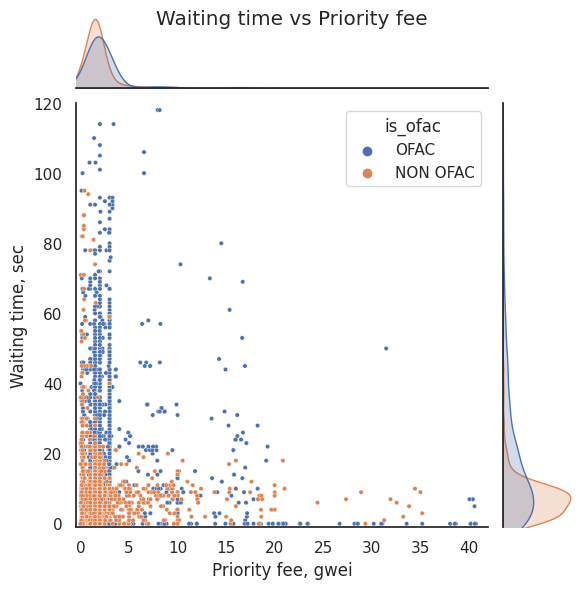

OFAC mean waiting time: 18.6865, median: 12.0
NON OFAC mean waiting time: 8.0735, median: 7.0


In [33]:
sample_size = 2000
ofac_sample = ofac_transactions_no_outliers.sample(sample_size)
non_ofac_sample = non_ofac_transactions_no_outliers.sample(sample_size)

merged_sample = pd.concat([ofac_sample, non_ofac_sample]).copy()
merged_sample.loc[merged_sample['is_ofac'], 'is_ofac'] = 'OFAC'
merged_sample.loc[merged_sample['is_ofac'] != 'OFAC', 'is_ofac'] = 'NON OFAC'
p = sns.jointplot(data=merged_sample, x="priority_fee", y="wait_time_adjusted", hue="is_ofac", s=10, ylim=(-1, 120), xlim=(-0.5, 42))
p.fig.suptitle("Waiting time vs Priority fee")
plt.xlabel('Priority fee, gwei')
plt.ylabel('Waiting time, sec')
plt.show()
print(f"OFAC mean waiting time: {ofac_sample['wait_time_adjusted'].mean()}, median: {ofac_sample['wait_time_adjusted'].median()}")
print(f"NON OFAC mean waiting time: {non_ofac_sample['wait_time_adjusted'].mean()}, median: {non_ofac_sample['wait_time_adjusted'].median()}")

In [34]:
ofac_transactions_no_outliers_subsample = ofac_transactions[(ofac_transactions['wait_time_adjusted'] < 60)
                                                            & (ofac_transactions['priority_fee'] < 20)]
print(f'Filtered OFAC transactions: {len(ofac_transactions_no_outliers_subsample)}')

non_ofac_transactions_no_outliers_subsample = non_ofac_sample_transactions[(non_ofac_sample_transactions['wait_time_adjusted'] < 60)
                                                                           & (non_ofac_sample_transactions['priority_fee'] < 20)]
print(f'Filtered NON OFAC transactions: {len(non_ofac_transactions_no_outliers_subsample)}')

Filtered OFAC transactions: 2070
Filtered NON OFAC transactions: 9432


## <font color='green'>Оставим только транзакции с временем ожидания < 60 и priority fee < 20</font>

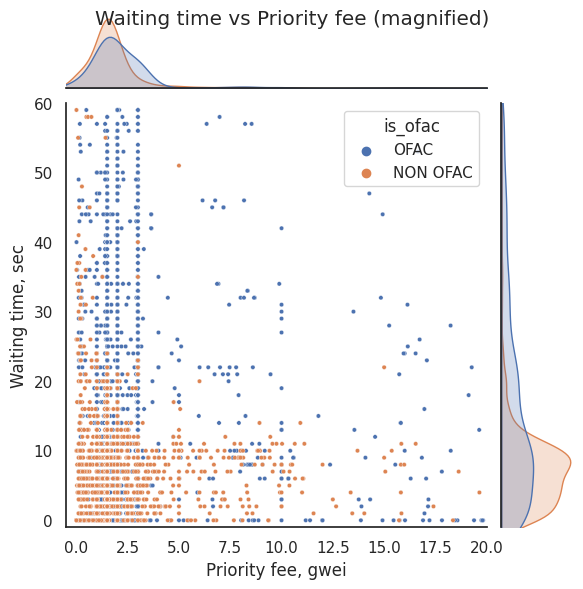

OFAC mean waiting time: 16.131, median: 11.0
NON OFAC mean waiting time: 7.47, median: 7.0


In [35]:
sample_size = 2000
ofac_subsample = ofac_transactions_no_outliers_subsample.sample(sample_size)
non_ofac_subsample = non_ofac_transactions_no_outliers_subsample.sample(sample_size)

merged_subsample = pd.concat([ofac_subsample, non_ofac_subsample]).copy()
merged_subsample.loc[merged_subsample['is_ofac'], 'is_ofac'] = 'OFAC'
merged_subsample.loc[merged_subsample['is_ofac'] != 'OFAC', 'is_ofac'] = 'NON OFAC'
p = sns.jointplot(data=merged_subsample, x="priority_fee", y="wait_time_adjusted", hue="is_ofac", s=10, ylim=(-1, 60), xlim=(-0.5, 20))
p.fig.suptitle("Waiting time vs Priority fee (magnified)")
plt.xlabel('Priority fee, gwei')
plt.ylabel('Waiting time, sec')
plt.show()
print(f"OFAC mean waiting time: {ofac_subsample['wait_time_adjusted'].mean()}, median: {ofac_subsample['wait_time_adjusted'].median()}")
print(f"NON OFAC mean waiting time: {non_ofac_subsample['wait_time_adjusted'].mean()}, median: {non_ofac_subsample['wait_time_adjusted'].median()}")

## Посмотрим аналитику по LIDO/NON LIDO

In [36]:
all_non_ofac = tr_data[~tr_data['is_ofac']]
all_ofac = tr_data[tr_data['is_ofac']]

print('All transactions distribution:')
print(tr_data['validator_type'].value_counts() / len(tr_data))
print('\nNon OFAC transactions distribution:')
print(all_non_ofac['validator_type'].value_counts() / len(all_non_ofac))
print('\nOFAC transactions distribution:')
print(all_ofac['validator_type'].value_counts() / len(all_ofac))

All transactions distribution:
Non Lido    0.694542
Lido        0.305458
Name: validator_type, dtype: float64

Non OFAC transactions distribution:
Non Lido    0.694537
Lido        0.305463
Name: validator_type, dtype: float64

OFAC transactions distribution:
Non Lido    0.717892
Lido        0.282108
Name: validator_type, dtype: float64


In [37]:
lido_non_ofac_sample = all_non_ofac[all_non_ofac['validator_type'] == 'Lido'].sample(10000)
lido_ofac_sample = all_ofac[all_ofac['validator_type'] == 'Lido']

print(f'OFAC: {len(lido_ofac_sample)}, NON OFAC: {len(lido_non_ofac_sample)}')

OFAC: 637, NON OFAC: 10000


In [38]:
lido_ofac_transactions_no_outliers = lido_ofac_sample[(lido_ofac_sample['wait_time_adjusted'] < ofac_99_wait_time)
                                                      & (lido_ofac_sample['priority_fee'] < ofac_99_priority_fee)]
print(f'Filtered Lido OFAC transactions: {len(lido_ofac_transactions_no_outliers)}')

lido_non_ofac_transactions_no_outliers = lido_non_ofac_sample[(lido_non_ofac_sample['wait_time_adjusted'] < non_ofac_97_wait_time)
                                                              & (lido_non_ofac_sample['priority_fee'] < non_ofac_99_priority_fee)]
print(f'Filtered Lido NON OFAC transactions: {len(lido_non_ofac_transactions_no_outliers)}')

Filtered Lido OFAC transactions: 627
Filtered Lido NON OFAC transactions: 9619


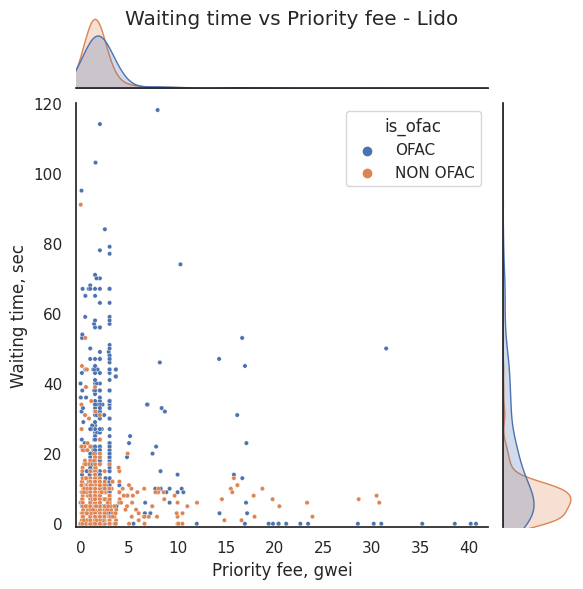

Lido OFAC mean waiting time: 18.025, median: 11.0
Lido NON OFAC mean waiting time: 7.503333333333333, median: 6.5


In [39]:
sample_size = 600
ofac_lido_sample = lido_ofac_transactions_no_outliers.sample(sample_size)
non_ofac_lido_sample = lido_non_ofac_transactions_no_outliers.sample(sample_size)

merged_lido_sample = pd.concat([ofac_lido_sample, non_ofac_lido_sample]).copy()
merged_lido_sample.loc[merged_lido_sample['is_ofac'], 'is_ofac'] = 'OFAC'
merged_lido_sample.loc[merged_lido_sample['is_ofac'] != 'OFAC', 'is_ofac'] = 'NON OFAC'
p = sns.jointplot(data=merged_lido_sample, x="priority_fee", y="wait_time_adjusted", hue="is_ofac", s=10, ylim=(-1, 120), xlim=(-0.5, 42))
p.fig.suptitle("Waiting time vs Priority fee - Lido")
plt.xlabel('Priority fee, gwei')
plt.ylabel('Waiting time, sec')
plt.show()
print(f"Lido OFAC mean waiting time: {ofac_lido_sample['wait_time_adjusted'].mean()}, median: {ofac_lido_sample['wait_time_adjusted'].median()}")
print(f"Lido NON OFAC mean waiting time: {non_ofac_lido_sample['wait_time_adjusted'].mean()}, median: {non_ofac_lido_sample['wait_time_adjusted'].median()}")

# <font color='red'>Можно аналогично посчитать по каждому валидатору Lido (но там будет совсем мало транзакций - так что данные нужны за больший период)</font>

# Посмотрим в принципе по валидаторам Lido - может кто-то будет сильно отличаться от ожидаемых значений

In [40]:
lido_tx = tr_data[tr_data['validator_type'] == 'Lido']
lido_validators_total_tx = lido_tx.groupby(['validator_name', 'is_ofac']).agg({'tx_hash': 'count'}).reset_index()

In [41]:
lido_validators_total_tx.loc[lido_validators_total_tx['is_ofac'], 'tx_hash'] /= lido_validators_total_tx[lido_validators_total_tx['is_ofac']]['tx_hash'].sum()
lido_validators_total_tx.loc[~lido_validators_total_tx['is_ofac'], 'tx_hash'] /= lido_validators_total_tx[~lido_validators_total_tx['is_ofac']]['tx_hash'].sum()

lido_validators_total_tx['is_ofac'] = lido_validators_total_tx['is_ofac'].apply(lambda x: 'OFAC' if x else 'NON OFAC')

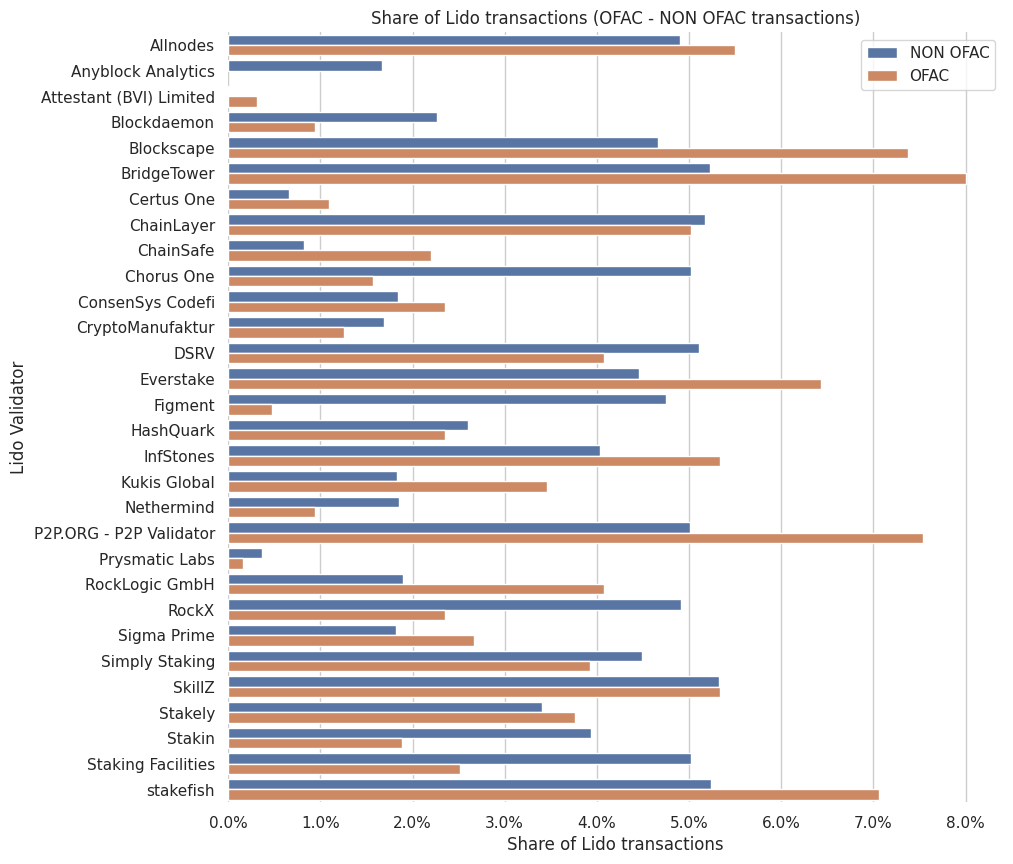

In [42]:
import matplotlib.ticker as mtick

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=lido_validators_total_tx, y="validator_name", x="tx_hash", hue="is_ofac")
ax.set_xlabel("Share of Lido transactions")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.set_ylabel("Lido Validator")
sns.despine(left=True, bottom=True)
plt.legend(loc=1)
plt.title('Share of Lido transactions (OFAC - NON OFAC transactions)')
ax = plt.gca()
ax.grid(True, axis='x')
plt.show()

## А теперь построим графики, для долей каждого валидатора Lido в транзакций OFAC/NON OFAC для всех транзакций ETH

In [43]:
lido_tx = tr_data[tr_data['validator_type'] == 'Lido']
lido_validators_total_tx = lido_tx.groupby(['validator_name', 'is_ofac']).agg({'tx_hash': 'count'}).reset_index()

lido_validators_total_tx['is_ofac'] = lido_validators_total_tx['is_ofac'].apply(lambda x: 'OFAC' if x else 'NON OFAC')

total_tx = len(tr_data)
total_ofac_tx = len(tr_data[tr_data['is_ofac']])
print(f'Total tx: {total_tx}, total OFAC tx: {total_ofac_tx}')

Total tx: 11527306, total OFAC tx: 2258


In [44]:
lido_validators_total_tx.loc[lido_validators_total_tx['is_ofac'] == 'OFAC', 'tx_hash'] /= total_ofac_tx
lido_validators_total_tx.loc[lido_validators_total_tx['is_ofac'] =='NON OFAC', 'tx_hash'] /= (total_tx - total_ofac_tx)

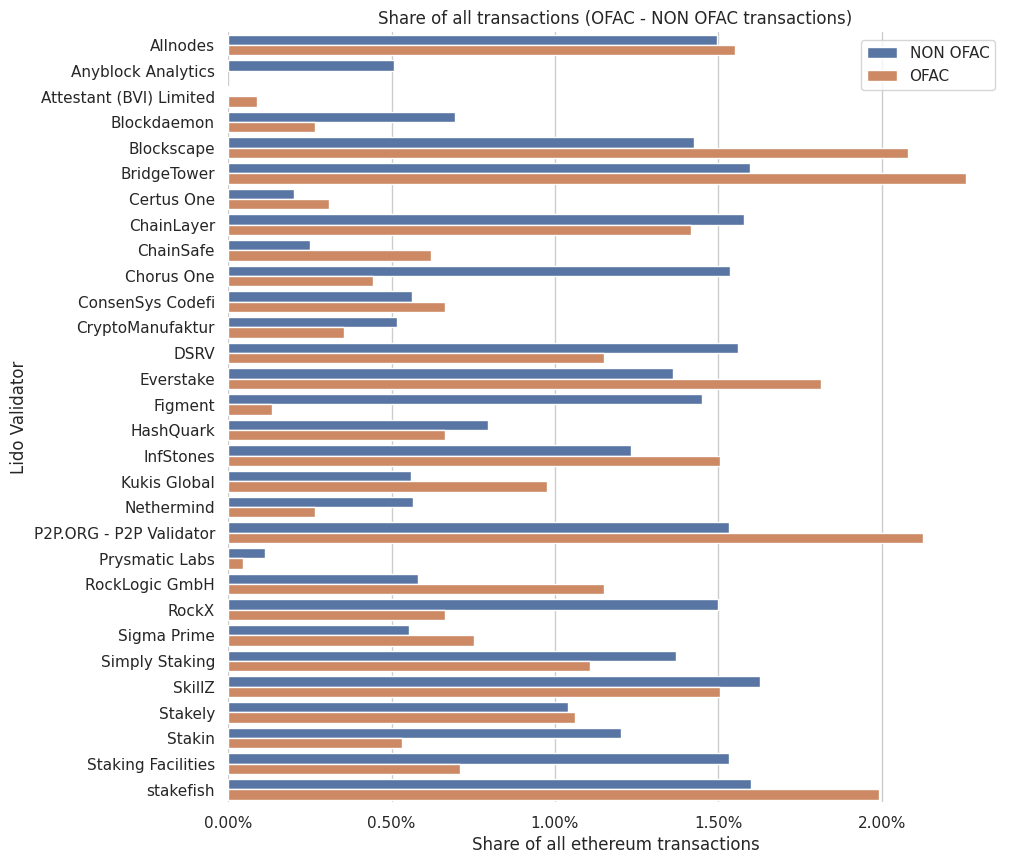

In [45]:
import matplotlib.ticker as mtick

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=lido_validators_total_tx, y="validator_name", x="tx_hash", hue="is_ofac")
ax.set_xlabel("Share of all ethereum transactions")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.set_ylabel("Lido Validator")
sns.despine(left=True, bottom=True)
plt.legend(loc=1)
plt.title('Share of all transactions (OFAC - NON OFAC transactions)')
ax = plt.gca()
ax.grid(True, axis='x')
plt.show()

### <font color='green'>Предварительные выводы:</font> 

<font color='green'> 1. Если оранжевый столбец > синего - это значит что вклад валидатора в нейтральность больше среднего, то есть он сам не цензуриует, и берет блоки либо у всех mev relays, либо у всех mev relaye кто не цензурирует</font><br>
<font color='green'> 2. Если оранжевого столбца нет - значит валидатор цензурирует - берет только у цензурирующих mev relays</font><br>
<font color='green'> 3. Если оранжевый столбец < синего - это значит что вклад валидатора в нейтральность меньше среднего, жесткой цензуры нет, но не берет блоки у каких-то mev relays без цензуры (а у каких-то берет)</font>

# Посмотрим есть ли зависимость от занятости сети

In [46]:
tr_data.columns

Index(['tx_hash', 'from', 'to', 'gas', 'gasPrice', 'blockNumber',
       'timestamp_x', 'miner', 'timestamp_y', 'waiting', 'validator',
       'public_key', 'validator_name', 'validator_address',
       'pub_key_lido_status', 'validator_type', 'eth_datetime', 'eth_hour',
       'is_contract_transaction', 'baseFeePerGas', 'wait_time_adjusted',
       'is_ofac', 'priority_fee'],
      dtype='object')

In [47]:
ts_baseFeePerGas = tr_data[['blockNumber', 'timestamp_x', 'baseFeePerGas']].groupby('blockNumber').agg('first')

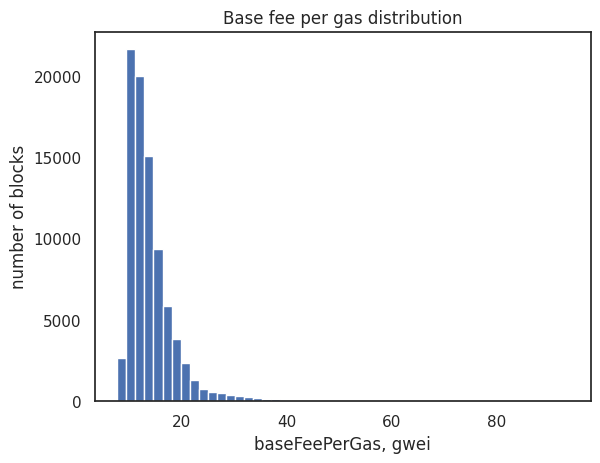

In [48]:
plt.hist(ts_baseFeePerGas['baseFeePerGas'], bins=50)
plt.title('Base fee per gas distribution')
plt.xlabel('baseFeePerGas, gwei')
plt.ylabel('number of blocks')
plt.show()

In [49]:
percentile_33 = np.percentile(ts_baseFeePerGas['baseFeePerGas'], 33)
print(f'33 percentile of base fee for gas: {percentile_33}')
percentile_66 = np.percentile(ts_baseFeePerGas['baseFeePerGas'], 66)
print(f'66 percentile of base fee for gas: {percentile_66}')
percentile_99 = np.percentile(ts_baseFeePerGas['baseFeePerGas'], 99)
print(f'99 percentile of base fee for gas: {percentile_99}')

33 percentile of base fee for gas: 11.45275212927
66 percentile of base fee for gas: 14.25104546272
99 percentile of base fee for gas: 35.95693436279992


In [50]:
low = 12
high = 20

In [51]:
ts_baseFeePerGas['time'] = ts_baseFeePerGas['timestamp_x'].apply(datetime.fromtimestamp)

In [52]:
ofac_by_ts = tr_data[tr_data['is_ofac']][['timestamp_x', 'tx_hash']].groupby(['timestamp_x']).agg('count').reset_index()
ofac_by_ts['time'] = ofac_by_ts['timestamp_x'].apply(datetime.fromtimestamp)

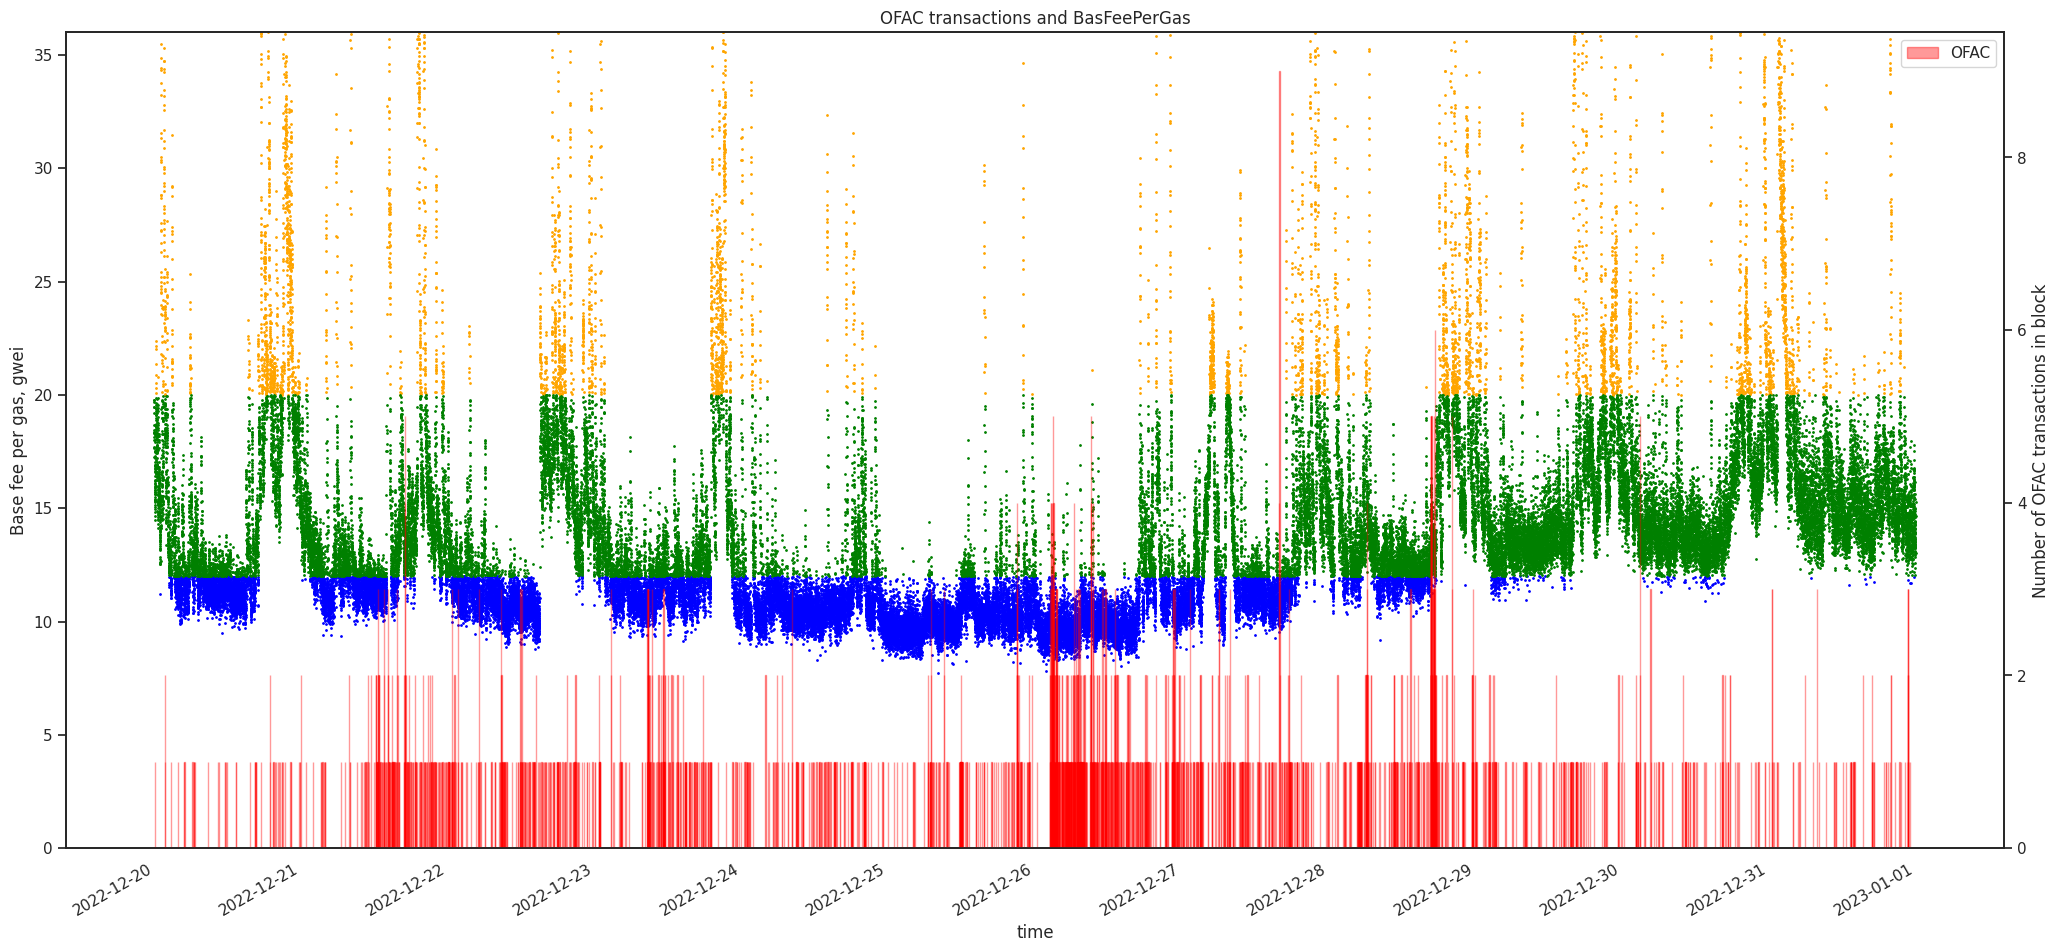

In [53]:
_ = plt.figure(figsize=(25, 12))
ax = plt.subplot()
ax.scatter("time", "baseFeePerGas",
           # hue="region", style="event",
           color='blue',
           data=ts_baseFeePerGas[ts_baseFeePerGas['baseFeePerGas'] < low], s=1)
ax.scatter("time", "baseFeePerGas",
           # hue="region", style="event",
           color='orange',
           data=ts_baseFeePerGas[ts_baseFeePerGas['baseFeePerGas'] > high], s=1)
ax.scatter("time", "baseFeePerGas",
           # hue="region", style="event",
           color='green',
           data=ts_baseFeePerGas[ts_baseFeePerGas['baseFeePerGas'].between(low, high)], s=1)
ax.set_ylim(0, np.ceil(percentile_99))
ax.set_ylabel('Base fee per gas, gwei')
ax.set_xlabel('time')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax_sec = ax.twinx()
# ax_sec.set_ylim(0, 20)
ax_sec.bar(ofac_by_ts['time'], ofac_by_ts['tx_hash'], color='red', edgecolor='red', width=0.001, label='OFAC', alpha=0.4)
ax_sec.set_ylabel('Number of OFAC transactions in block')
# ax_sec.scatter(ofac_by_ts['time'], ofac_by_ts['tx_hash'], color='red', label='OFAC')
plt.gcf().autofmt_xdate()
plt.legend(loc=1)
plt.title('OFAC transactions and BasFeePerGas')
plt.show()

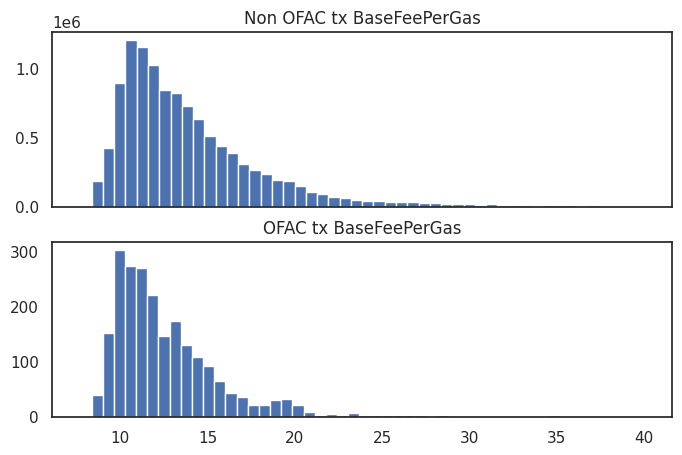

In [54]:
fig, axes = plt.subplots(2, 1, figsize=(8, 5), sharex=True)
axes[0].hist(tr_data[(~tr_data['is_ofac']) & (tr_data['baseFeePerGas'] < 40)]['baseFeePerGas'], bins=50)
axes[0].set_title('Non OFAC tx BaseFeePerGas')
axes[1].hist(tr_data[(tr_data['is_ofac']) & (tr_data['baseFeePerGas'] < 40)]['baseFeePerGas'], bins=50)
axes[1].set_title('OFAC tx BaseFeePerGas')
plt.show()

## <font color='green'>Закономерностей не найдено</font>

## Восстановим состояние мемпула по транзакциям, попавшим в БЧ (это не совсем правильно - но пока так)

# Добавим доп информацию о транзакциях в датасет и пересохраним

In [ ]:
with open('additional_tx_data.pickle', 'rb') as f:
    additional_tx_data = pickle.load(f)

assert len(additional_tx_data) == len(tr_data)

In [64]:
for col in ['maxFeePerGas', 'maxPriorityFeePerGas', 'gasUsed', 'effectiveGasPrice']:
    tr_data[col] = tr_data['tx_hash'].apply(lambda x: additional_tx_data[x][col])

In [66]:
tr_data.to_csv('data/merged_221220_221231_with_contracts.csv', index=False)

In [73]:
tr_data['maxFeePerGas'] = tr_data['maxFeePerGas'] / 10**9
tr_data['maxPriorityFeePerGas'] = tr_data['maxPriorityFeePerGas'] / 10**9
tr_data['effectiveGasPrice'] = tr_data['effectiveGasPrice'] / 10**9

In [74]:
tr_data.columns

Index(['tx_hash', 'from', 'to', 'gas', 'gasPrice', 'blockNumber',
       'timestamp_x', 'miner', 'timestamp_y', 'waiting', 'validator',
       'public_key', 'validator_name', 'validator_address',
       'pub_key_lido_status', 'validator_type', 'eth_datetime', 'eth_hour',
       'is_contract_transaction', 'baseFeePerGas', 'wait_time_adjusted',
       'is_ofac', 'priority_fee', 'maxFeePerGas', 'maxPriorityFeePerGas',
       'gasUsed', 'effectiveGasPrice'],
      dtype='object')

In [173]:
block_number = 16221292
block_ts = blocks_info[block_number]['timestamp']

transactions_already_included = tr_data[tr_data['blockNumber'] < block_number]
transactions_seen_before = tr_data[tr_data['timestamp_y'] < block_ts]

print(f'Transaction included in blocks before this: {len(transactions_already_included)}')
print(f'Transaction first seen before this block: {len(transactions_seen_before)}')

Transaction included in blocks before this: 396
Transaction first seen before this block: 105696


In [174]:
gas_limit = blocks_info[block_number]['gasLimit']
gas_used = blocks_info[block_number]['gasUsed']
baseFePerGas = blocks_info[block_number]['baseFeePerGas'] / 10 ** 9

print(f'Block number: {block_number} ts: {block_ts}')
print(f'Block gas limit: {gas_limit}')
print(f'Block gas used: {gas_used}')
print(f'Block baseFeePerGas: {baseFePerGas}')
print(f'Block number of tx: {len(blocks_info[block_number]["transactions"])}')

Block number: 16221292 ts: 1671483623
Block gas limit: 30000000
Block gas used: 10688063
Block baseFeePerGas: 18.302901781
Block number of tx: 148


In [201]:
eligible_transactions = transactions_seen_before[(transactions_seen_before['maxFeePerGas'] >= baseFePerGas)
                                                 & (transactions_seen_before['blockNumber'] >= block_number)].copy()
print(f'Total eligible transactions: {len(eligible_transactions)}')

Total eligible transactions: 687


In [202]:
eligible_transactions['residualFeePerGas'] = eligible_transactions['maxFeePerGas'] - baseFePerGas
eligible_transactions['availablePriorityFee'] = eligible_transactions[['residualFeePerGas', 'maxPriorityFeePerGas']].min(axis=1)
eligible_transactions['naive_fee'] = eligible_transactions['availablePriorityFee'] * eligible_transactions['gasUsed'] / 10**9
eligible_transactions['already_waiting'] = block_ts - eligible_transactions['timestamp_y']
eligible_transactions.sort_values('naive_fee', ascending=False, inplace=True)
eligible_transactions['priority_number'] = range(len(eligible_transactions))

In [203]:
n_current_block = len(eligible_transactions[(eligible_transactions['blockNumber'] == block_number)])
n_next_block = len(eligible_transactions[(eligible_transactions['blockNumber'] == block_number + 1)])
n_after_next_block = len(eligible_transactions[(eligible_transactions['blockNumber'] > block_number + 1)])

print(f'Curernt: {n_current_block}, next: {n_next_block}. after next: {n_after_next_block}')

Curernt: 136, next: 183. after next: 368


In [217]:
long_waiting_same_from_to = eligible_transactions[(eligible_transactions['blockNumber'] > block_number + 1)
                                                  & (eligible_transactions['from'] == eligible_transactions['to'])]
print(len(long_waiting_same_from_to))
long_waiting_same_from_to[['tx_hash', 'is_ofac', 'maxFeePerGas', 'maxPriorityFeePerGas',
                           'gasUsed', 'naive_fee', 'already_waiting', 'priority_number']].head(60)

65


,tx_hash,is_ofac,maxFeePerGas,maxPriorityFeePerGas,gasUsed,naive_fee,already_waiting,priority_number
6110920,0xd095a05f3a3156ee98df8d0e41aac581f6ded504209d...,False,200.000000,200.000000,21000,0.003816,103834.0,24
6110892,0x5849f2406f6d6f56311169a5ae67fc002f3662c5aa88...,False,150.040000,150.040000,21000,0.002766,103834.0,26
7372079,0x11680b4b03c26ffc557ce7ddcdc75a8a05068bbb4ac5...,False,52.601494,44.434646,21000,0.000720,65902.0,36
4974830,0xab18db41841b025454018a59b57916437c48d213044f...,False,38.291781,6.500000,21000,0.000137,125574.0,145
4974829,0x3aeb9b967098004efba62434dc83268d4848c24fb520...,False,38.645908,4.500000,21000,0.000095,125574.0,184
3358514,0xe0a6515e9518c36e143ede29695898735d5d80aa7d29...,False,22.000000,5.500000,21000,0.000078,115941.0,223
262722,0x7c26f58959ee671566eddc3ba6a78612e36674fce96b...,False,32.207068,3.000000,21000,0.000063,1688.0,289
11230,0x5959a84493633b21a8ca5893f24fea168e85c3a07471...,False,29.590337,2.750000,21000,0.000058,2187.0,402
264075,0x829c36bfcfbea40ecf4810649c93688191cfc77d250d...,False,34.227790,2.500000,21000,0.000053,1688.0,417
3368831,0xe645ea716bf65e6f8fdf41dc76235292de082065207f...,False,33.588182,2.500000,21000,0.000053,7893.0,418


In [223]:
long_waiting_same_from_to['tx_hash'].values

array(['0xd095a05f3a3156ee98df8d0e41aac581f6ded504209d4c875a8c022463845108',
       '0x5849f2406f6d6f56311169a5ae67fc002f3662c5aa88146238f7dd7836e28cc8',
       '0x11680b4b03c26ffc557ce7ddcdc75a8a05068bbb4ac5c3f575149e4cb3539f7d',
       '0xab18db41841b025454018a59b57916437c48d213044f6f8e664864a2034a2373',
       '0x3aeb9b967098004efba62434dc83268d4848c24fb520a3f40b47a2890a56c918',
       '0xe0a6515e9518c36e143ede29695898735d5d80aa7d296d6af4e0cf2cc34e7b43',
       '0x7c26f58959ee671566eddc3ba6a78612e36674fce96b639dcf695fdef7657e39',
       '0x5959a84493633b21a8ca5893f24fea168e85c3a07471c1e7f9c73bb58d757511',
       '0x829c36bfcfbea40ecf4810649c93688191cfc77d250d9084ba46b680dde88f00',
       '0xe645ea716bf65e6f8fdf41dc76235292de082065207f9a333fbe57fbf8fdf3f6',
       '0xedcc4f5668d94b1f213dd6eaf01479a6667b20a272af77bc41a8a349ed7d9f0d',
       '0x6f73c81f045d4fab65b90b4bcdb470081e560ebfa1dc7b324774215a73801338',
       '0xee0f22933dc7a4400cf63294324c4d82139f06b85193310f2489b407a5a9f803',

In [219]:
long_waiting_diff_from_to = eligible_transactions[(eligible_transactions['blockNumber'] > block_number + 1)
                                                  & (eligible_transactions['from'] != eligible_transactions['to'])]
print(len(long_waiting_diff_from_to))
long_waiting_diff_from_to[['tx_hash', 'is_ofac', 'maxFeePerGas', 'maxPriorityFeePerGas',
                           'gasUsed', 'naive_fee', 'already_waiting', 'priority_number']].head(60)

303


,tx_hash,is_ofac,maxFeePerGas,maxPriorityFeePerGas,gasUsed,naive_fee,already_waiting,priority_number
3724528,0x577544f6848aff943fccd789bf2346f2af62b9383b7f...,False,27.000000,27.000000,117212,0.001019,122109.0,34
5881611,0x543ce1fedf9a89f7efb9308661140889a041d7358ca2...,False,35.000000,35.000000,44899,0.000750,111968.0,35
17759,0x90ee7d7098efd37b47a9eee424bbbaa6bc94e9803e9d...,False,31.845566,27.000000,44851,0.000607,3032.0,37
6568169,0xd364e4e6c8c75e9faed5163aafde330e9d60d483097e...,False,28.127737,2.000000,251203,0.000502,10273.0,40
2630841,0x5f4ca69a7cf662c98ff5e03a3c3711c79bbcfc3bbb6c...,False,20.248344,2.000000,248069,0.000483,93205.0,44
941940,0xc1c7bbddeb6ca8479243b8587535686448e0d44d566e...,False,41.062485,27.374990,21000,0.000478,4939.0,45
984431,0x93c30fbd751d44c30fde1ce14a891405c3419d669ef2...,False,29.824590,1.037308,448660,0.000465,105021.0,47
597711,0x68db06a88836bd3694193c98b07556b565d3b3ceaf79...,False,29.677969,29.677969,40063,0.000456,118870.0,48
1406740,0x1ec3f7a2c29deb98a493cfb7c56e79ce017cce62a751...,False,20.158039,2.000000,238933,0.000443,51875.0,49
3724405,0x027c7f3242502786ca43bd8332d5290faa7215975657...,False,22.000000,22.000000,117236,0.000433,122109.0,50


In [222]:
long_waiting_diff_from_to['tx_hash'].values

array(['0x577544f6848aff943fccd789bf2346f2af62b9383b7f4bfcf481a9220edff1ca',
       '0x543ce1fedf9a89f7efb9308661140889a041d7358ca2a933d1c294b215320663',
       '0x90ee7d7098efd37b47a9eee424bbbaa6bc94e9803e9dcfed2eae71c36e701a04',
       '0xd364e4e6c8c75e9faed5163aafde330e9d60d483097e3daf37555882ef2faf6d',
       '0x5f4ca69a7cf662c98ff5e03a3c3711c79bbcfc3bbb6cc7979dd8e529e4a94666',
       '0xc1c7bbddeb6ca8479243b8587535686448e0d44d566e3cd7a52aa733c7a7eea8',
       '0x93c30fbd751d44c30fde1ce14a891405c3419d669ef25f500a95f454f0974463',
       '0x68db06a88836bd3694193c98b07556b565d3b3ceaf797e9c07184a74871c7cff',
       '0x1ec3f7a2c29deb98a493cfb7c56e79ce017cce62a751f0402e8a40a77444f684',
       '0x027c7f3242502786ca43bd8332d5290faa7215975657fd68ba2f6a51e5daeacb',
       '0x5965cb055d80331642e3d980e8638053ec0be7ea08f1768cad8424f6b56d3f3e',
       '0xef93014ba1434359972f6e7a40a6f72fb4429af7bfc8dce3d55e949f66c1b9e7',
       '0x48e783fdc43c31bd2d8f6779952ef9c18f0727dea1d3a029eb15f4d943f0db3e',

In [225]:
import web3
from web3 import Web3, HTTPProvider, IPCProvider 

geth_ipc = '/media/Warehouse/Warehouse/Ethereum/data/.ethereum/geth.ipc'
w3 = Web3(IPCProvider(geth_ipc))
# w3 = Web3(HTTPProvider('http://localhost:8545'))
print ("Latest Ethereum block number" , w3.eth.blockNumber)

Latest Ethereum block number 16535270


In [262]:
w3.eth.get_transaction('0x577544f6848aff943fccd789bf2346f2af62b9383b7f4bfcf481a9220edff1ca')

AttributeDict({'blockHash': HexBytes('0x473a269d49c2c6801710c556557ecd2475a8366b716de183edac75c7acd6188b'),
 'blockNumber': 16247806,
 'from': '0x8692d4f5500E051Cc7bc63E67D8e23e7457cD884',
 'gas': 462904,
 'gasPrice': 27000000000,
 'maxFeePerGas': 27000000000,
 'maxPriorityFeePerGas': 27000000000,
 'hash': HexBytes('0x577544f6848aff943fccd789bf2346f2af62b9383b7f4bfcf481a9220edff1ca'),
 'input': '0xabcffc260000000000000000000000004fe5b965e3bd76eff36280471030ef9b0e6e2c1d000000000000000000000000000000000000000000000000000000000000008000000000000000000000000000000000000000000000000000000000000002400000000000000000000000000000000000000000000000000000000000000520000000000000000000000000eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee0000000000000000000000007db5af2b9624e1b3b4bb69d6debd9ad1016a58ac000000000000000000000000000000000000000000000000000000000000012000000000000000000000000000000000000000000000000000000000000001600000000000000000000000008692d4f5500e051cc7bc63e67d8e23e7457cd884000000000000000

In [235]:
block_number

16221292

In [261]:
address_of_interest = '0xd5e2bc1fb479839f045eddc9b2e28143ed29d498'

for i, n in enumerate(range(w3.eth.blockNumber, block_number, -1)):
    print(f'{i} {n} {w3.eth.get_transaction_count(w3.toChecksumAddress(address_of_interest), n)}')

0 16535351 19
1 16535350 19
2 16535349 19
3 16535348 19
4 16535347 19
5 16535346 19
6 16535345 19
7 16535344 19
8 16535343 19
9 16535342 19
10 16535341 19
11 16535340 19
12 16535339 19
13 16535338 19
14 16535337 19
15 16535336 19
16 16535335 19
17 16535334 19
18 16535333 19
19 16535332 19
20 16535331 19
21 16535330 19
22 16535329 19
23 16535328 19
24 16535327 19
25 16535326 19
26 16535325 19
27 16535324 19
28 16535323 19
29 16535322 19
30 16535321 19
31 16535320 19
32 16535319 19
33 16535318 19
34 16535317 19
35 16535316 19
36 16535315 19
37 16535314 19
38 16535313 19
39 16535312 19
40 16535311 19
41 16535310 19
42 16535309 19
43 16535308 19
44 16535307 19
45 16535306 19
46 16535305 19
47 16535304 19
48 16535303 19
49 16535302 19
50 16535301 19
51 16535300 19
52 16535299 19
53 16535298 19
54 16535297 19
55 16535296 19
56 16535295 19
57 16535294 19
58 16535293 19
59 16535292 19
60 16535291 19
61 16535290 19
62 16535289 19
63 16535288 19
64 16535287 19
65 16535286 19
66 16535285 19
67 16

ValueError: {'code': -32000, 'message': 'missing trie node 4689bb1f0d8a977216e72371935c093c58c88b80ab00ba4fb0a838da58e107c8 (path ) <nil>'}

In [133]:
eligible_transactions[eligible_transactions['blockNumber'] == block_number]['already_waiting'].value_counts()

8.0     27
11.0    27
7.0     22
9.0     18
10.0    13
5.0     11
12.0     9
15.0     5
4.0      1
23.0     1
20.0     1
18.0     1
Name: already_waiting, dtype: int64

In [105]:
eligible_transactions.columns

Index(['tx_hash', 'from', 'to', 'gas', 'gasPrice', 'blockNumber',
       'timestamp_x', 'miner', 'timestamp_y', 'waiting', 'validator',
       'public_key', 'validator_name', 'validator_address',
       'pub_key_lido_status', 'validator_type', 'eth_datetime', 'eth_hour',
       'is_contract_transaction', 'baseFeePerGas', 'wait_time_adjusted',
       'is_ofac', 'priority_fee', 'maxFeePerGas', 'maxPriorityFeePerGas',
       'gasUsed', 'effectiveGasPrice', 'residualFeePerGas',
       'availablePriorityFee', 'naive_fee'],
      dtype='object')

In [104]:
eligible_transactions[['waiting_time']]

KeyError: "None of [Index(['waiting_time'], dtype='object')] are in the [columns]"

In [716]:
additional_tx_data['0x3f17f629de1a15118a2e8042fd57888a9bc20e8a7dd04231fb9657e49fe2f53e'].keys()

dict_keys(['maxFeePerGas', 'maxPriorityFeePerGas', 'gasUsed', 'effectiveGasPrice'])

In [717]:
for k in ['maxFeePerGas', 'maxPriorityFeePerGas', 'gasUsed', 'effectiveGasPrice']:
    eligible_transactions[k] = eligible_transactions['tx_hash'].apply(lambda x: additional_tx_data[x][k])

KeyError: '0x886d0f1a080ea28b2e610b46cc4dac85ad04b0c3f4aa1a7483aec3f9bbe791a5'

In [648]:
block_transactions = [s.hex() for s in blocks_info[block_number]['transactions']]
eligible_hashes = eligible_transactions['tx_hash'].to_list()

In [657]:
print(f'Transactions in block: {len(blocks_info[block_number]["transactions"])}')
block_transactions = eligible_transactions[eligible_transactions['blockNumber'] == block_number].copy()
print(f'Transactions in df: {len(block_transactions)}')

Transactions in block: 148
Transactions in df: 148


In [659]:
block_transactions['gas'].sum()

21568712

# Разберемся с количеством газа в блоке

In [661]:
from web3 import Web3, IPCProvider

geth_ipc = '/media/Warehouse/Warehouse/Ethereum/data/.ethereum/geth.ipc'
w3 = Web3(IPCProvider(geth_ipc))
# Check
print ("Latest Ethereum block number" , w3.eth.blockNumber)

Latest Ethereum block number 16511384


In [701]:
tx

AttributeDict({'blockHash': HexBytes('0x47113ab19d73a5c56854ae24273a1caf43b477a175964557464f92078f8317d0'),
 'blockNumber': 16221291,
 'from': '0xf7C8133baEa3313993B3c476c016aa869C991679',
 'gas': 292432,
 'gasPrice': 18212433401,
 'hash': HexBytes('0x9febfdc63677cd0decb532cb049004add2959d7f1a1f75982ddb952963d9216d'),
 'input': '0xcba9bc660000000000000000000000008e32017436f58f3b8839c432f5740230d2ff84820000000000000000000000007a250d5630b4cf539739df2c5dacb4c659f2488d00000000000000000000000000000000000000000000000000000000000000e00000000000000000000000000000000000000000000000000000000000000140000000000000000000000000000000000000000000000000016345785d8a0000000000000000000000000000000000000000000000000000001639cb0c8d11b6000000000000000000000000f7c8133baea3313993b3c476c016aa869c9916790000000000000000000000000000000000000000000000000000000000000002000000000000000000000000000000000000000000000000000000000000000000000000000000000000000057598acebc6638164682502ae9064abdd1d935a60000000000000000000

In [702]:
tx_receipt

AttributeDict({'blockHash': HexBytes('0x47113ab19d73a5c56854ae24273a1caf43b477a175964557464f92078f8317d0'),
 'blockNumber': 16221291,
 'contractAddress': None,
 'cumulativeGasUsed': 764623,
 'effectiveGasPrice': 18212433401,
 'from': '0xf7C8133baEa3313993B3c476c016aa869C991679',
 'gasUsed': 208202,
 'logs': [AttributeDict({'address': '0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2',
   'topics': [HexBytes('0xe1fffcc4923d04b559f4d29a8bfc6cda04eb5b0d3c460751c2402c5c5cc9109c'),
    HexBytes('0x0000000000000000000000007a250d5630b4cf539739df2c5dacb4c659f2488d')],
   'data': '0x0000000000000000000000000000000000000000000000000162349f2c1b4000',
   'blockNumber': 16221291,
   'transactionHash': HexBytes('0x9febfdc63677cd0decb532cb049004add2959d7f1a1f75982ddb952963d9216d'),
   'transactionIndex': 3,
   'blockHash': HexBytes('0x47113ab19d73a5c56854ae24273a1caf43b477a175964557464f92078f8317d0'),
   'logIndex': 14,
   'removed': False}),
  AttributeDict({'address': '0xC02aaA39b223FE8D0A0e5C4F27eAD9083

In [662]:
block_actual = w3.eth.get_block(block_number)

In [679]:
block_number

16221292

In [666]:
print(f'baseFeePerGas: {block_actual["baseFeePerGas"] / 10**9:0.2f}, gasLimit: {block_actual["gasLimit"]}, gasUsed {block_actual["gasUsed"]}')

baseFeePerGas: 18.30, gasLimit: 30000000, gasUsed 10688063


In [688]:
total_gas = 0
total_priority_fee = 0
for tx_hash in block_actual['transactions']:
    tx = w3.eth.get_transaction(tx_hash)
    tx_receipt = w3.eth.get_transaction_receipt(tx_hash)
    total_gas += tx_receipt['gasUsed']
    total_priority_fee += total_gas * (tx['gasPrice'] - block_actual['baseFeePerGas'])
    
assert total_gas == block_actual['gasUsed']

In [692]:
total_priority_fee // 10**9

2219539677

In [695]:
tr_data.columns

Index(['tx_hash', 'from', 'to', 'gas', 'gasPrice', 'blockNumber',
       'timestamp_x', 'miner', 'timestamp_y', 'waiting', 'validator',
       'public_key', 'validator_name', 'validator_address',
       'pub_key_lido_status', 'validator_type', 'eth_datetime', 'eth_hour',
       'is_contract_transaction', 'baseFeePerGas', 'wait_time_adjusted',
       'is_ofac', 'priority_fee', 'baseGasFee_level'],
      dtype='object')

In [693]:
tx

AttributeDict({'blockHash': HexBytes('0x81bf2e8e470bace425a862e052fec4c7fd849af59465803fee59d8e10fd9c819'),
 'blockNumber': 16221292,
 'from': '0xCBD6832Ebc203e49E2B771897067fce3c58575ac',
 'gas': 90000,
 'gasPrice': 18552901781,
 'maxFeePerGas': 35382705826,
 'maxPriorityFeePerGas': 250000000,
 'hash': HexBytes('0xb72ed02171aa52ad8c382ce59fdb1f4887465ff12134391289d9036b0fbe95df'),
 'input': '0x',
 'nonce': 207918,
 'to': '0x2f4F0c5546CE585211E3137DC335168B88449253',
 'transactionIndex': 147,
 'value': 341956000000000000,
 'type': '0x2',
 'accessList': [],
 'chainId': '0x1',
 'v': 1,
 'r': HexBytes('0x1581c3d6c771541bb6be2de2cdb4ddc6a65f9d1ae51fd0730d7b72be4b19c3af'),
 's': HexBytes('0x2e774bb7b7ba72b33bbd48bee0ae41b9341cf7b5ee3d59c2e3e3d88588be1632')})

In [694]:
tx_receipt

AttributeDict({'blockHash': HexBytes('0x81bf2e8e470bace425a862e052fec4c7fd849af59465803fee59d8e10fd9c819'),
 'blockNumber': 16221292,
 'contractAddress': None,
 'cumulativeGasUsed': 10688063,
 'effectiveGasPrice': 18552901781,
 'from': '0xCBD6832Ebc203e49E2B771897067fce3c58575ac',
 'gasUsed': 21000,
 'logs': [],
 'logsBloom': HexBytes('0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'),
 'status': 1,
 'to': '0x2f4F0c5546CE585211E3137DC335168B88449253',
 'transactionHash': HexBytes('0xb72ed02171aa52ad8c382ce59fdb1f4887465ff121343

In [705]:
blocks_info[block_number]

AttributeDict({'baseFeePerGas': 18302901781,
 'difficulty': 0,
 'extraData': HexBytes('0x'),
 'gasLimit': 30000000,
 'gasUsed': 10688063,
 'hash': HexBytes('0x81bf2e8e470bace425a862e052fec4c7fd849af59465803fee59d8e10fd9c819'),
 'logsBloom': HexBytes('0x84781954628c0248d3aca440808a076104701c504df800904c89a41b5611128312a4130845a7d737c05f132e431881010ab1b0588a1dac2ccfc002af42262003022c7a20084c3c487b9e160ee32660a84ac624a00656816007051c05d209d405528085790e478d061497100c10480e1ad18038544cdda77de28c087180186a08500469c6c28e454a06ec1c02dfa8009c06012801a180c64910ec0649815cc0a69e42058c5b18e0dac76215921d688d4391c38bb0151997223904311e002311b47c2922d3cb4720410150a107113458c780c6444a1e8c4450821039230010e20760f2a05b00200807029d048404f8099d8d34000550d810f8e45f89da0e10da01'),
 'miner': '0x6a0db4Cef1CE2A5F81C8E6322862439F71ACa29d',
 'mixHash': HexBytes('0x5bbfc4df8f1086eafe756838f4e9c5cae65a9e2b058fe6ee4819f2c269e1d93d'),
 'nonce': HexBytes('0x0000000000000000'),
 'number': 16221292,
 'parentHash': HexBy